<a href="https://colab.research.google.com/github/act-moises/diplomado/blob/main/Calificar_Prueba_Zavic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

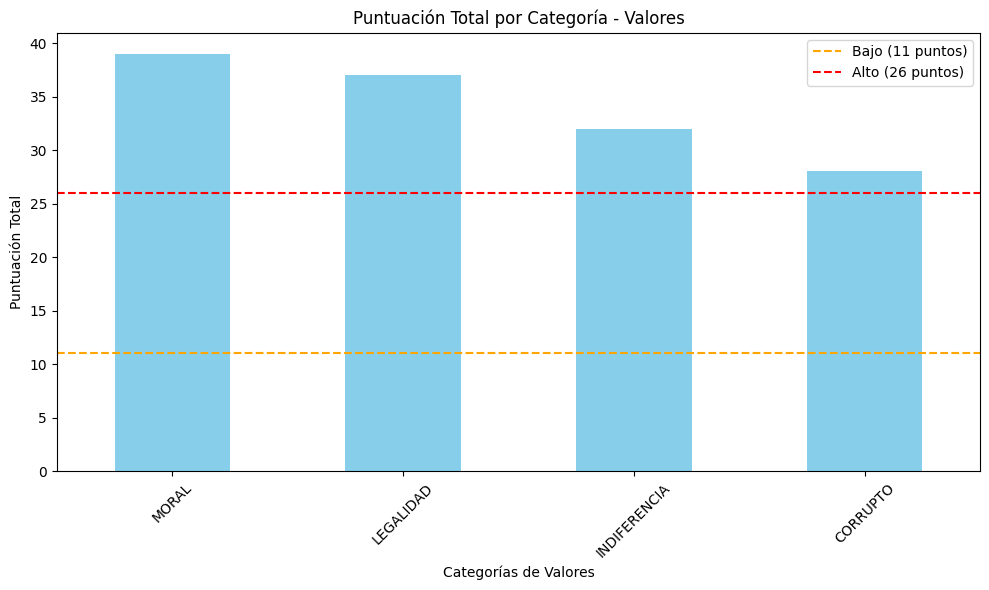

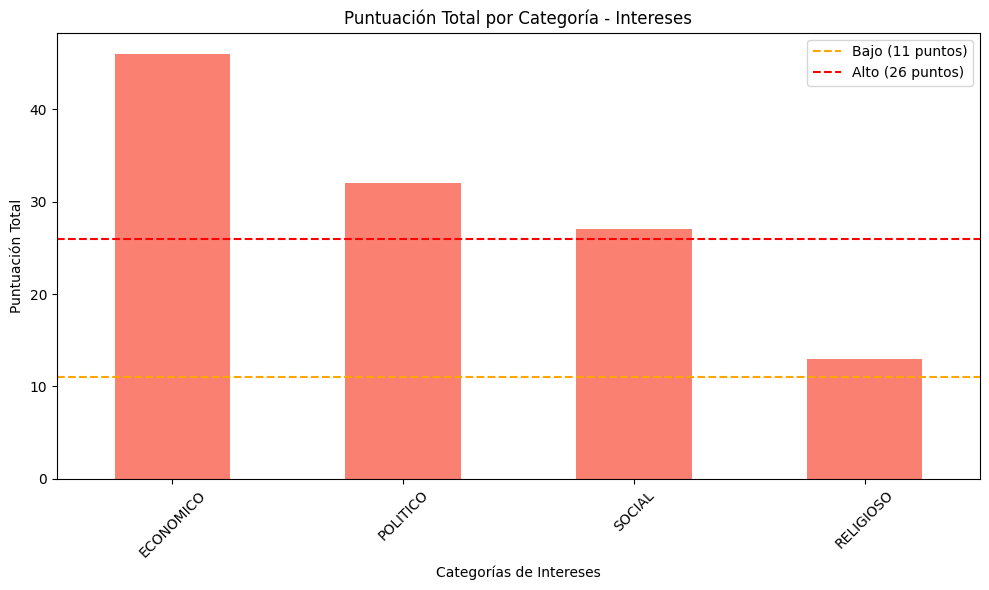

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df_respuestas_ejemplo = pd.read_csv('form1.csv')

# Filtrar las columnas a partir de la columna 93 (índice 92 en Python)
df_respuestas_evaluacion = df_respuestas_ejemplo.iloc[:, 92:].copy()

# Diccionario de puntuación basado en importancia
puntuacion_importancia = {
    "4. Más Importante": 4,
    "3. Importante": 3,
    "2. Poco Importante": 2,
    "1. Sin Importancia": 1
}

# Procesar cada columna de respuestas y asignar la puntuación
for col in df_respuestas_evaluacion.columns:
    # Convertir cada respuesta en su puntuación correspondiente
    df_respuestas_evaluacion[col] = df_respuestas_evaluacion[col].map(puntuacion_importancia)

# Definir las columnas correspondientes a "Valores" y "Intereses"
# Aquí, "valores_columns" y "intereses_columns" representan las categorías deseadas
valores_columns = {
    'MORAL': [3, 4, 6, 8, 13, 15, 17, 19],
    'LEGALIDAD': [3, 6, 8, 12, 13, 15, 17, 19],
    'INDIFERENCIA': [3, 4, 8, 12, 13, 15, 19],
    'CORRUPTO': [3, 4, 6, 9, 12, 15, 19]
}
intereses_columns = {
    'ECONOMICO': [1, 2, 5, 10, 14, 16, 18, 20],
    'POLITICO': [1, 7, 10, 11, 16, 18],
    'SOCIAL': [2, 7, 10, 16, 20],
    'RELIGIOSO': [5, 11, 14]
}

# Sumar los puntajes para cada categoría de "Valores"
valores_totales = {cat: df_respuestas_evaluacion.iloc[:, indices].sum().sum() for cat, indices in valores_columns.items()}
valores_totales = pd.Series(valores_totales)

# Sumar los puntajes para cada categoría de "Intereses"
intereses_totales = {cat: df_respuestas_evaluacion.iloc[:, indices].sum().sum() for cat, indices in intereses_columns.items()}
intereses_totales = pd.Series(intereses_totales)

# Gráfica para las categorías de "Valores" con líneas horizontales
plt.figure(figsize=(10, 6))
valores_totales.plot(kind='bar', color='skyblue')
plt.title("Puntuación Total por Categoría - Valores")
plt.xlabel("Categorías de Valores")
plt.ylabel("Puntuación Total")
plt.axhline(y=11, color='orange', linestyle='--', label='Bajo (11 puntos)')
plt.axhline(y=26, color='red', linestyle='--', label='Alto (26 puntos)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Gráfica para las categorías de "Intereses" con líneas horizontales
plt.figure(figsize=(10, 6))
intereses_totales.plot(kind='bar', color='salmon')
plt.title("Puntuación Total por Categoría - Intereses")
plt.xlabel("Categorías de Intereses")
plt.ylabel("Puntuación Total")
plt.axhline(y=11, color='orange', linestyle='--', label='Bajo (11 puntos)')
plt.axhline(y=26, color='red', linestyle='--', label='Alto (26 puntos)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
